## Graph optionnel

In [ ]:
df = train.groupby(['age', 'outcome']).size().reset_index(name='count')
df['percent'] = df.groupby('age')['count'].transform(lambda x: (x / x.sum()) * 100)

In [ ]:
fig = px.bar(
    df, x="age", y='percent', color="outcome",
    # barmode="group",
    title="Distribution en pourcentage de la cible par âge",
    width=800, height=400
)
fig.show()

In [ ]:
pivot = df.pivot(index="age", columns="outcome", values="percent")

<Axes: xlabel='age'>

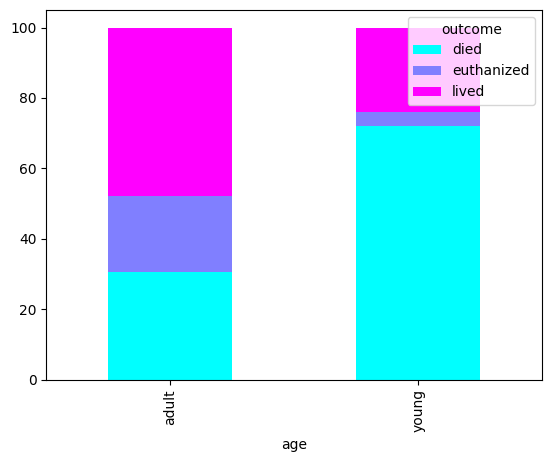

In [ ]:
pivot.plot(
    # x="age",
    # y="percent",
    # layout="outcome",
    kind="bar",
    stacked=True,
    colormap="cool"
)

# TPOT

In [ ]:
import tpot
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='f1_micro', verbosity=2, random_state=1, n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: 0.7088032170644286
                                                                              
Generation 2 - Current best internal CV score: 0.7198815455896496
                                                                              
Generation 3 - Current best internal CV score: 0.7198815455896496
                                                                              
Generation 4 - Current best internal CV score: 0.7260840108401083
                                                                              
Generation 5 - Current best internal CV score: 0.7260840108401083
                                                                              
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=100, n_jobs=1, subsample=0.6500000000000001, verbosity=0)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='f1_micro', verbosity=2)

In [ ]:
model.export('tpot_sonar_best_model.py')

In [ ]:
y_train

array([0., 1., 2., ..., 2., 2., 2.])

In [ ]:
model.fit(X_train, train['outcome'])

                                                                             
Generation 1 - Current best internal CV score: 0.7158208759506947
                                                                              
Generation 2 - Current best internal CV score: 0.7179845266194598
                                                                              
Generation 3 - Current best internal CV score: 0.7206683276510185
                                                                              
Generation 4 - Current best internal CV score: 0.7206683276510185
                                                                              
Generation 5 - Current best internal CV score: 0.7225478625754
                                                                              
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=5, max_features=0.7500000000000001, min_samples_leaf=9, min_samples_split=6, n_estimators=100, subsample=0.8)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='f1_micro', verbosity=2)

In [ ]:
X_train = train_encoded.drop(columns='outcome')
y_train = train_encoded['outcome']

In [ ]:
model.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: 0.7033984614039689
                                                                              
Generation 2 - Current best internal CV score: 0.7033984614039689
                                                                              
Generation 3 - Current best internal CV score: 0.7098850423988112
                                                                              
Generation 4 - Current best internal CV score: 0.7098850423988112
                                                                              
Generation 5 - Current best internal CV score: 0.7106565259200978
                                                                              
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=19, min_samples_split=9, n_estimators=100, subsample=0.60

TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='f1_micro', verbosity=2)

## Outliers

In [ ]:
train.shape

(1235, 28)

In [ ]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    df = df[df[feature] < upper_limit]
    # df = df[df[feature] > lower_limit]

    return df


In [ ]:
new_df = train.copy()
for cat in num_train:
    new_df = remove_outliers(new_df, cat)

new_df.shape

(800, 28)

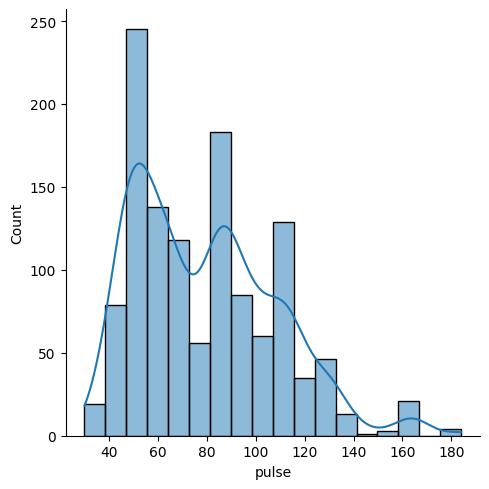

In [ ]:
sns.displot(train['pulse'], kde=True)

<Axes: ylabel='pulse'>

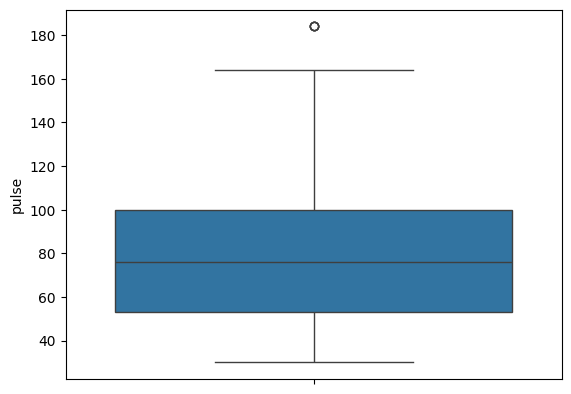

In [ ]:
sns.boxplot(train['pulse'])

In [ ]:
percentile25 = train['pulse'].quantile(0.25)
percentile75 = train['pulse'].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
upper_limit, lower_limit

(170.5, -17.5)

In [ ]:
train[train['pulse'] > upper_limit]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
338,yes,adult,529685,38.4,184.0,58.0,normal,normal,bright_pink,less_3_sec,...,42.0,7.5,cloudy,1.7,yes,2124,0,0,yes,lived
420,yes,young,529340,38.3,184.0,30.0,cool,reduced,pale_pink,less_3_sec,...,48.0,6.1,serosanguious,4.5,yes,2205,0,0,yes,died
967,yes,adult,530526,38.5,184.0,84.0,cold,reduced,dark_cyanotic,more_3_sec,...,60.0,6.5,serosanguious,3.4,yes,7111,0,0,yes,died
1029,yes,young,529172,37.6,184.0,60.0,normal,reduced,bright_pink,less_3_sec,...,74.0,6.8,cloudy,2.6,yes,8400,0,0,yes,died


In [ ]:
train[train['pulse'] < lower_limit]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome


In [ ]:
new_train = train[train['pulse'] < upper_limit]

<Axes: ylabel='pulse'>

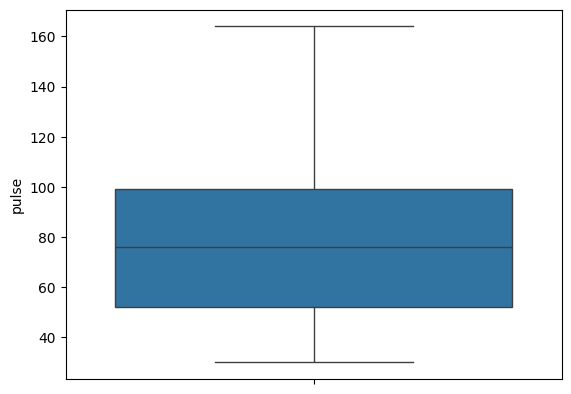

In [ ]:
sns.boxplot(new_train['pulse'])

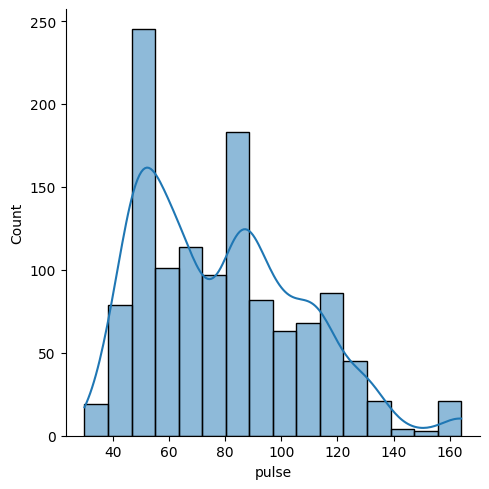

In [ ]:
sns.displot(new_train['pulse'], kde=True)

In [ ]:
new_train_cap = train.copy()
new_train_cap['pulse'] = np.where(
    new_train_cap['pulse'] > upper_limit,
    upper_limit,
    np.where(
        new_train_cap['pulse'] < lower_limit,
        lower_limit,
        new_train_cap['pulse']
    )
)

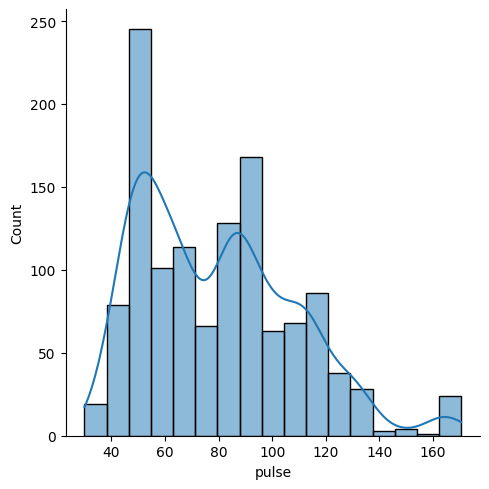

In [ ]:
sns.displot(new_train_cap['pulse'], kde=True)

<Axes: ylabel='pulse'>

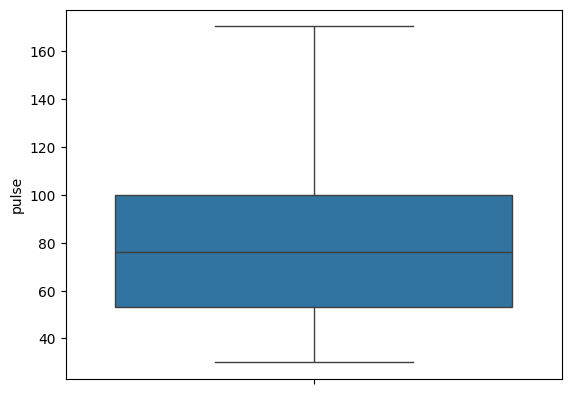

In [ ]:
sns.boxplot(new_train_cap['pulse'])

In [ ]:
num_train

['hospital_number',
 'rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [ ]:
num_train.remove('hospital_number')
num_train.remove('lesion_1')
num_train.remove('lesion_2')
num_train.remove('lesion_3')

In [ ]:
num_train

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein']

In [ ]:
def plot_num_features(df, columns):
    for feature in columns:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        sns.histplot(data=df, x=feature, kde=True, hue='outcome', bins=30, ax=axes[0])
        sns.boxplot(df[feature], ax=axes[1])

        plt.show()

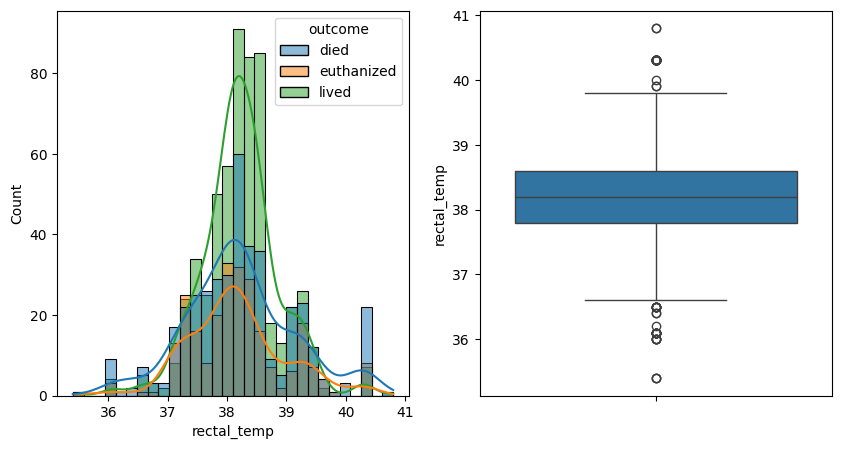

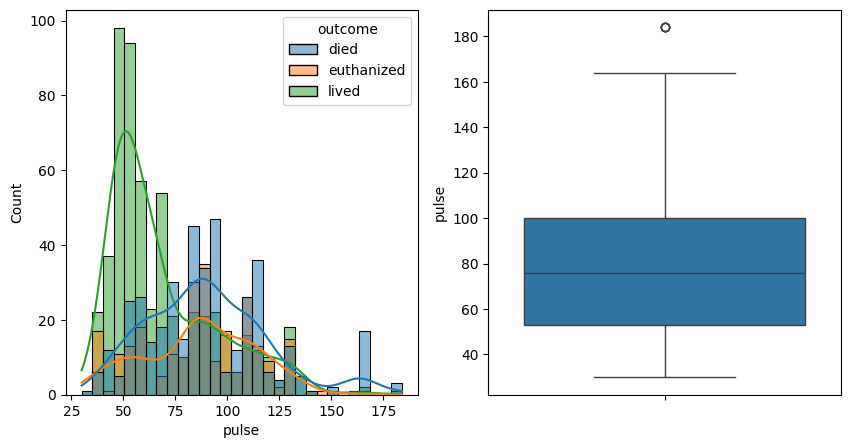

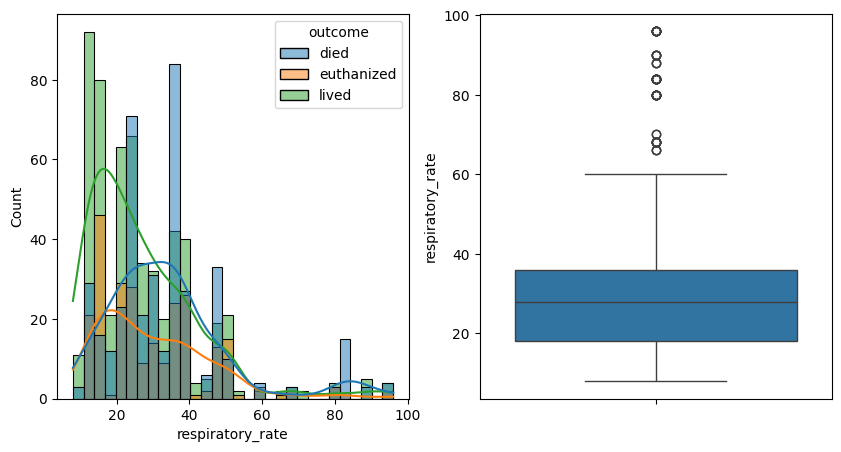

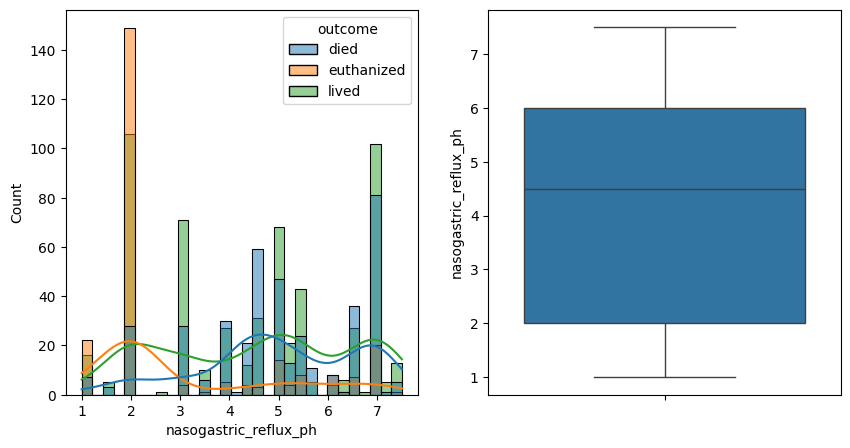

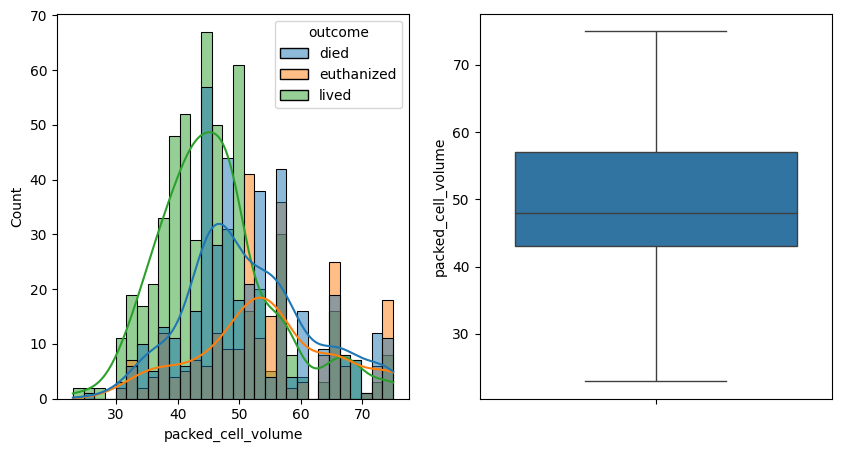

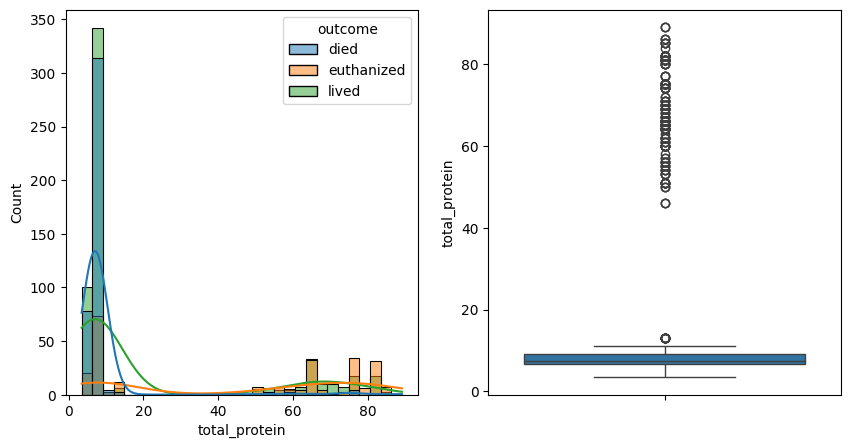

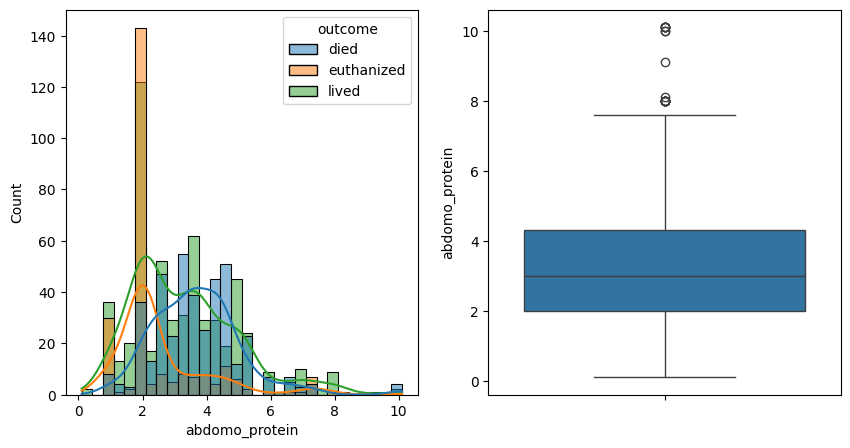

In [ ]:
for feature in num_train:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(data=train, x=feature, kde=True, hue='outcome', bins=30, ax=axes[0])
    sns.boxplot(train[feature], ax=axes[1])

    plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

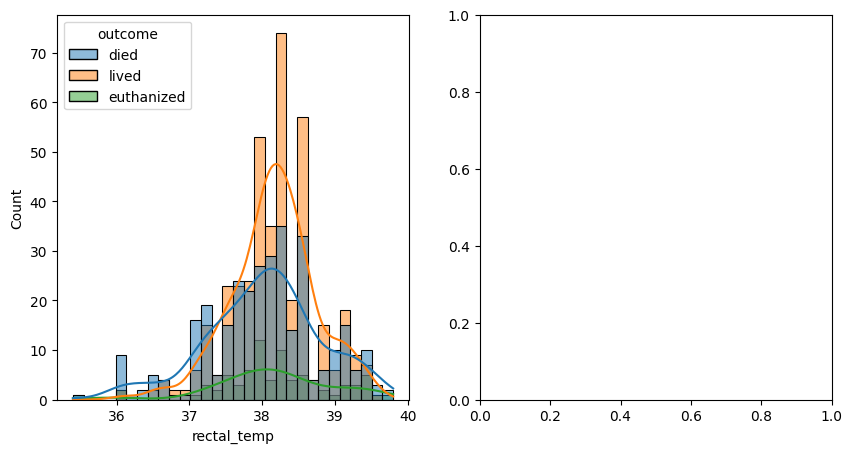

In [ ]:
for feature in num_train:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(data=new_df, x=feature, kde=True, hue='outcome', bins=30, ax=axes[0])
    sns.boxplot(new_df[feature], ax=axes[1])

    plt.show()

In [ ]:
## Scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler
minmax_scaler = MinMaxScaler()
normalized_train = train.copy()

for cat in num_train:
    normalized_train[[cat]] = minmax_scaler.fit_transform(normalized_train[[cat]])
plot_num_features(normalized_train, num_train)
robust_scaler = RobustScaler()
robust_train = train.copy()

for cat in num_train:
    robust_train[[cat]] = robust_scaler.fit_transform(robust_train[[cat]])
plot_num_features(robust_train, num_train)